In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import pickle
#from scipy.misc import imread

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
data = np.load('YSong-Apr01_data.npy')

In [8]:
data.shape

(400, 214)

<IPython.core.display.Javascript object>


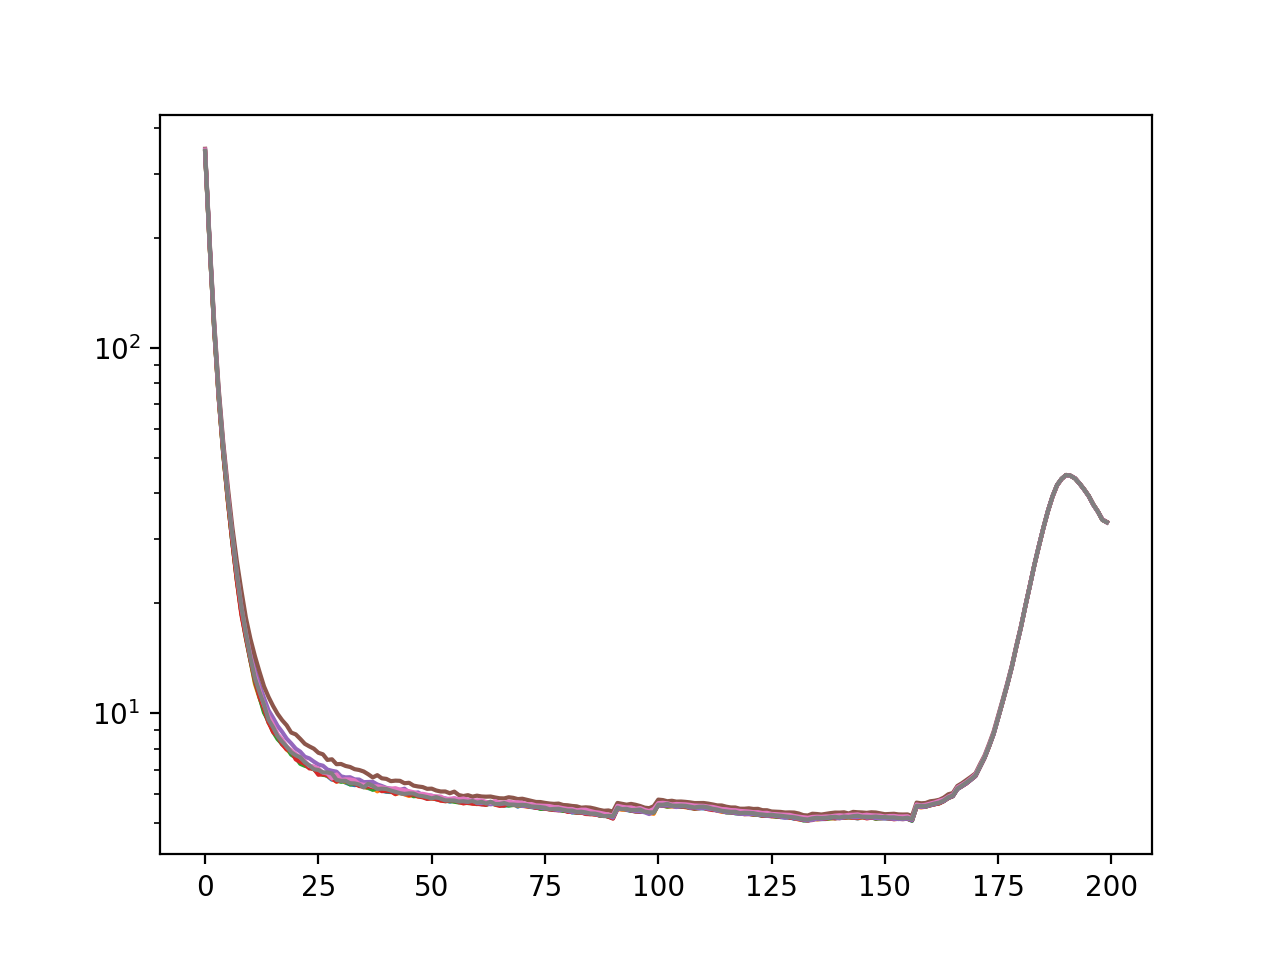

In [146]:
fig, ax = plt.subplots()
ax.semilogy(data[0::50,:-14].T)

# PCA

In [108]:
# cut and normalize data first
# normalization is performed as zero mean and unit variance
start_from = 100   
cut_v = 14  # all zero values in the end
data_scaled = preprocessing.scale(data[start_from:,:-cut_v])
print('data shape: ', data_scaled.shape)

data shape:  (300, 200)


In [149]:
#np.average(data_scaled, axis=0)

<IPython.core.display.Javascript object>


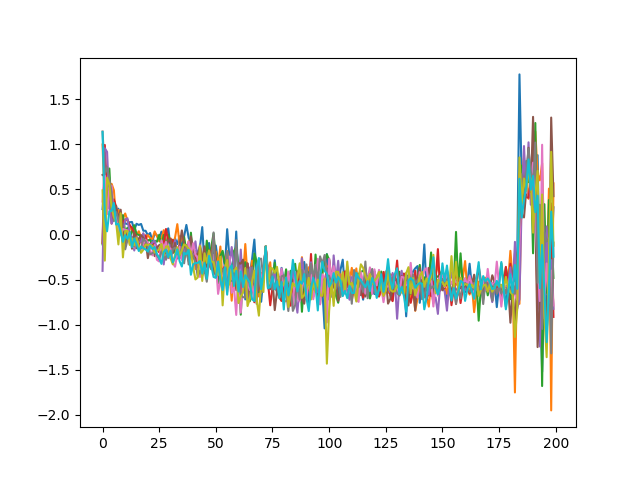

In [112]:
fig, ax = plt.subplots()
ax.plot(data_scaled[100:110,:].T)

In [86]:
#np.std(data_scaled, axis=0)

In [119]:
# get low dimension from PCA for plot
n_comp = 5
pca = PCA(n_components=n_comp)
reduced_data = pca.fit_transform(data_scaled)
print(pca.components_.shape, reduced_data.shape)

(5, 200) (300, 5)


<IPython.core.display.Javascript object>


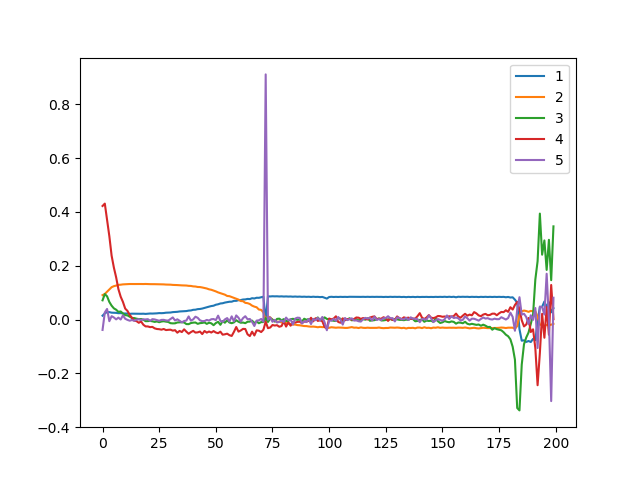

In [120]:
# plot different components from PCA
fig, ax = plt.subplots()
for i in range(n_comp):
    ax.plot(pca.components_[i], label=str(i+1))
ax.legend()

<IPython.core.display.Javascript object>


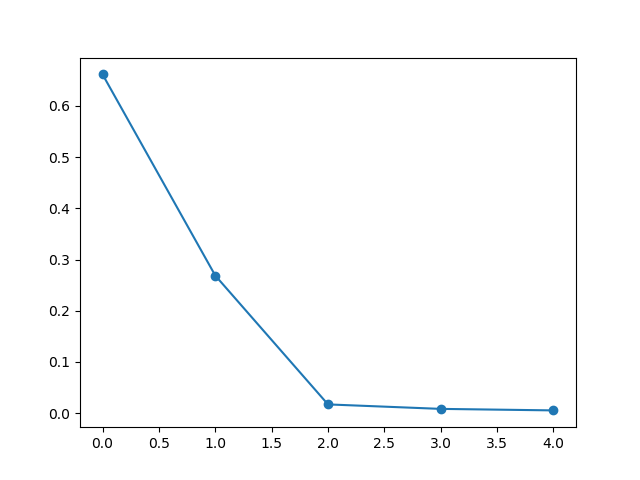

In [121]:
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_, '-o')

<IPython.core.display.Javascript object>


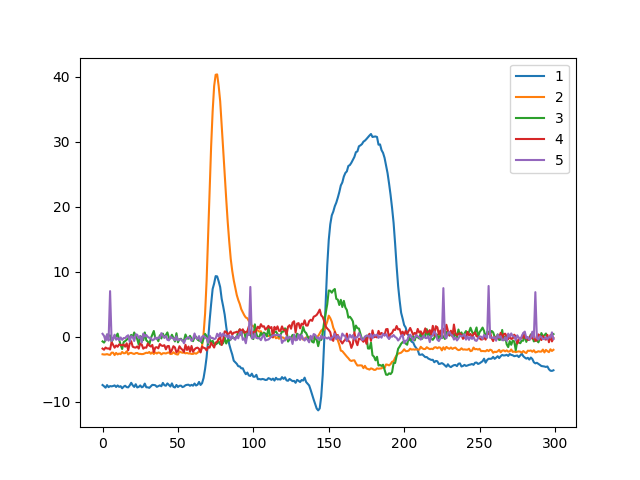

In [122]:
# projections on different principle components as a function of frame number
fig, ax = plt.subplots()
for i in range(n_comp):
    ax.plot(reduced_data[:,i], label=str(i+1))
ax.legend()

In [150]:
#fig, ax = plt.subplots()
#ax.plot(reduced_data[:, 0], reduced_data[:, 1])

# Kmeans

In [127]:
#np.random.seed(42)

# K means on reduced data (gives similar results as whole dataset)
nclusters = 3
kmeans = KMeans(init='k-means++', n_clusters=nclusters, n_init=10)
kmeans_out = kmeans.fit_predict(reduced_data)

<IPython.core.display.Javascript object>


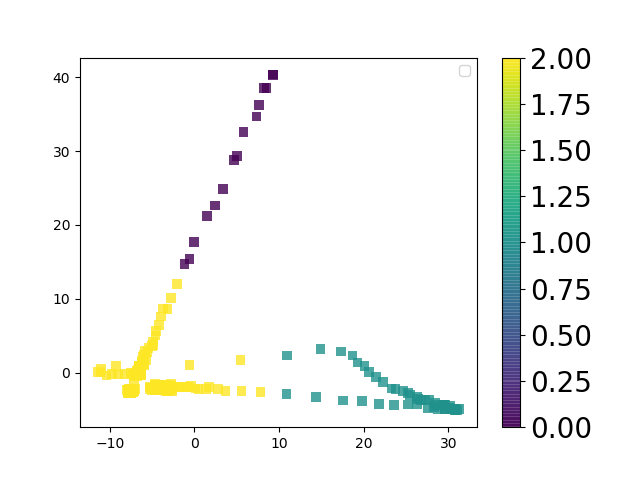

No handles with labels found to put in legend.


In [136]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=kmeans_out, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

plt.legend()

<IPython.core.display.Javascript object>


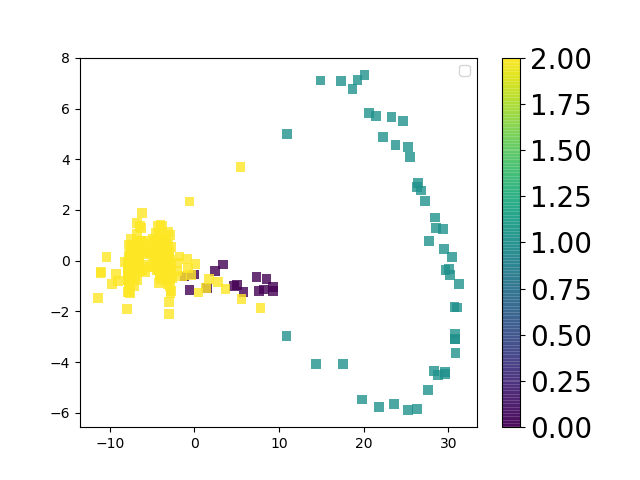

No handles with labels found to put in legend.


In [129]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 2], 
                c=kmeans_out, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

plt.legend()